data importing

In [66]:
import numpy as np

In [44]:
precip_lat_data=np.load('precip_lat_data.npy')
precip_lon_data=np.load('precip_lon_data.npy')
precip_kmeans=np.load('precip_kmeans.npy')

In [58]:
air_lat_data=np.load('air_lat_data.npy')
air_lon_data=np.load('air_lon_data.npy')
air_kmeans=np.load('air_kmeans.npy')

In [61]:
new_air_lat_data=np.delete(np.flip(air_lat_data),72)

data merging

In [62]:
new_lat=(precip_lat_data+new_air_lat_data)/2
new_lon=(precip_lon_data+air_lon_data)/2

In [64]:
labels=[]
for i in range(len(precip_kmeans)):
    line=[]
    line.append(precip_kmeans[i])
    line.append(air_kmeans[i])
    labels.append(line)

In [104]:
for i in range(5):
    for j in range(5):
        print([i,j],[i,j] in labels)      

[0, 0] False
[0, 1] True
[0, 2] True
[0, 3] True
[0, 4] True
[1, 0] True
[1, 1] True
[1, 2] True
[1, 3] True
[1, 4] True
[2, 0] True
[2, 1] True
[2, 2] True
[2, 3] True
[2, 4] True
[3, 0] False
[3, 1] True
[3, 2] True
[3, 3] True
[3, 4] True
[4, 0] False
[4, 1] True
[4, 2] False
[4, 3] True
[4, 4] False


In [202]:
new_labels=[]
for i in range(len(labels)):
    for j in range(5):
        for k in range(5):
            line=[]
            if labels[i]==[j,k]:
                if j==0:
                    line.append(k)
                elif j==0:
                    line.append(5*j)
                else:
                    line.append((5*j+k))
                    new_labels.append(line)
            

visualizing

In [234]:
color=['aqua',
 'aquamarine',
 'azure',
 'beige',
 'black',
 'blue',
 'brown',
 'chartreuse',
 'chocolate',
 'coral',
 'crimson',
 'cyan',
 'darkblue',
 'darkgreen',
 'fuchsia',
 'gold',
 'goldenrod',
 'green',
 'grey',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lightblue',
 'lightgreen']

C:\Users\yunju\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


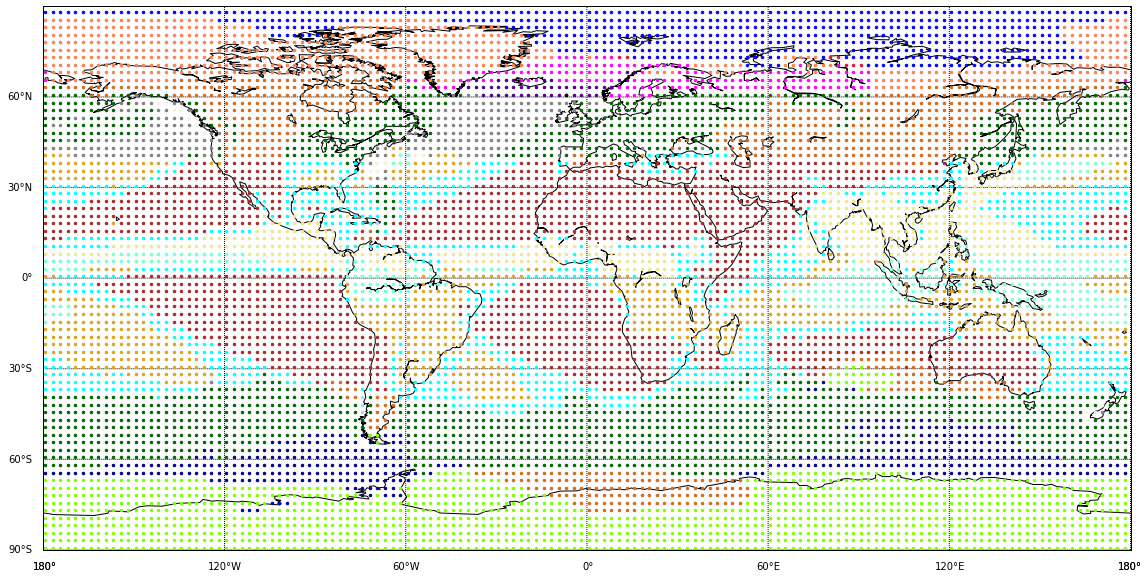

In [238]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\yunju\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap()


plt.figure(figsize=(22,10))
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])


for i in range(72):#위도
    for j in range(144):#경도
        for k in range(5):
            for l in range(5):
                if new_lon[j]<=180:
                    if labels[144*i+j]==[k,l]:
                        a, b = map(new_lon[j],new_lat[i])
                        if k==0:
                            map.plot(a, b, marker='.',color=color[l],markersize=5)
                        elif l==0:
                            map.plot(a, b, marker='.',color=color[5*k],markersize=5)
                        else:
                            map.plot(a, b, marker='.',color=color[5*k+l],markersize=5)
                else:
                    if labels[144*i+j]==[k,l]:
                        a, b = map(new_lon[j]-360,new_lat[i])
                        if k==0:
                            map.plot(a, b, marker='.',color=color[l],markersize=5)
                        if l==0:
                            map.plot(a, b, marker='.',color=color[5*k],markersize=5)
                        else:
                            map.plot(a, b, marker='.',color=color[5*k+l],markersize=5)                            

coloring reference

In [236]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}
overlap

{'aqua',
 'aquamarine',
 'azure',
 'beige',
 'black',
 'blue',
 'brown',
 'chartreuse',
 'chocolate',
 'coral',
 'crimson',
 'cyan',
 'darkblue',
 'darkgreen',
 'fuchsia',
 'gold',
 'goldenrod',
 'green',
 'grey',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lightblue',
 'lightgreen',
 'lime',
 'magenta',
 'maroon',
 'navy',
 'olive',
 'orange',
 'orangered',
 'orchid',
 'pink',
 'plum',
 'purple',
 'red',
 'salmon',
 'sienna',
 'silver',
 'tan',
 'teal',
 'tomato',
 'turquoise',
 'violet',
 'wheat',
 'white',
 'yellow',
 'yellowgreen'}